Variables 

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

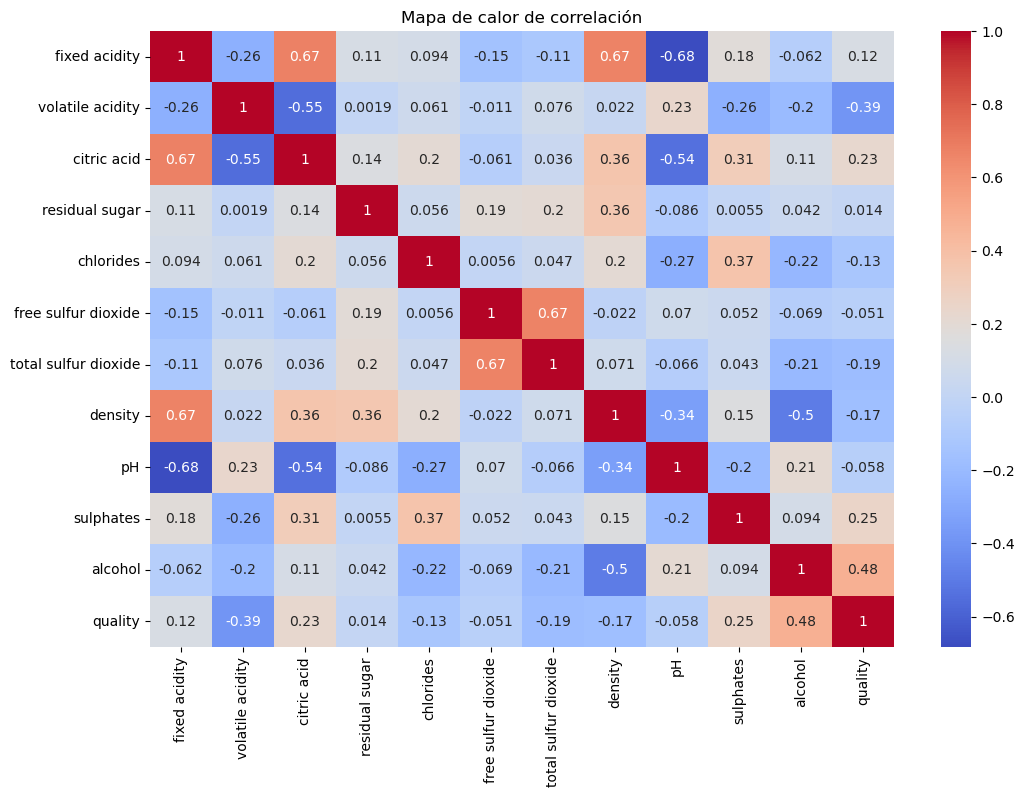

In [4]:
# ================================================
# PASO 1: Análisis Exploratorio de Datos
# ================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv('winequality-red.csv')

# Vista general
display(df.head())
display(df.describe())
display(df.isnull().sum())

# Mapa de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlación")
plt.show()


In [6]:
# ================================================
# PASO 2: Preprocesamiento de Datos
# ================================================
from sklearn.preprocessing import StandardScaler

# Convertir 'quality' en binaria para clasificación (opcional, según caso de uso)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
# ================================================
# PASO 3: Selección de Características
# ================================================
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X_scaled_df, y)
selected_features = X_scaled_df.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))

Características seleccionadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [10]:
# ================================================
# PASO 4: División en Train/Test
# ================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df[selected_features], y, test_size=0.3, random_state=42)

In [12]:
# ================================================
# PASO 5: Entrenamiento del Árbol de Decisión
# ================================================
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       413
           1       0.48      0.22      0.31        67

    accuracy                           0.86       480
   macro avg       0.68      0.59      0.61       480
weighted avg       0.83      0.86      0.84       480



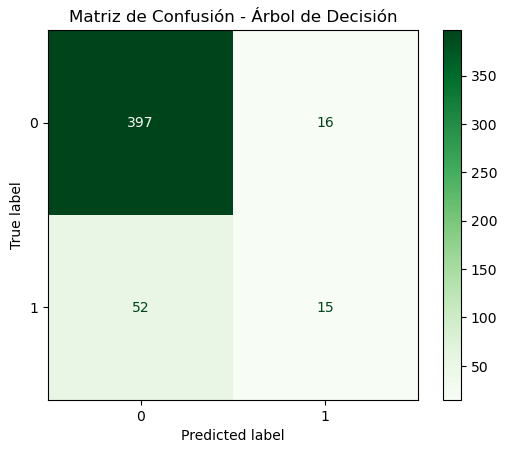

In [14]:
# ================================================
# PASO 6: Evaluación del Modelo
# ================================================
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = tree_model.predict(X_test)

# Reporte
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()


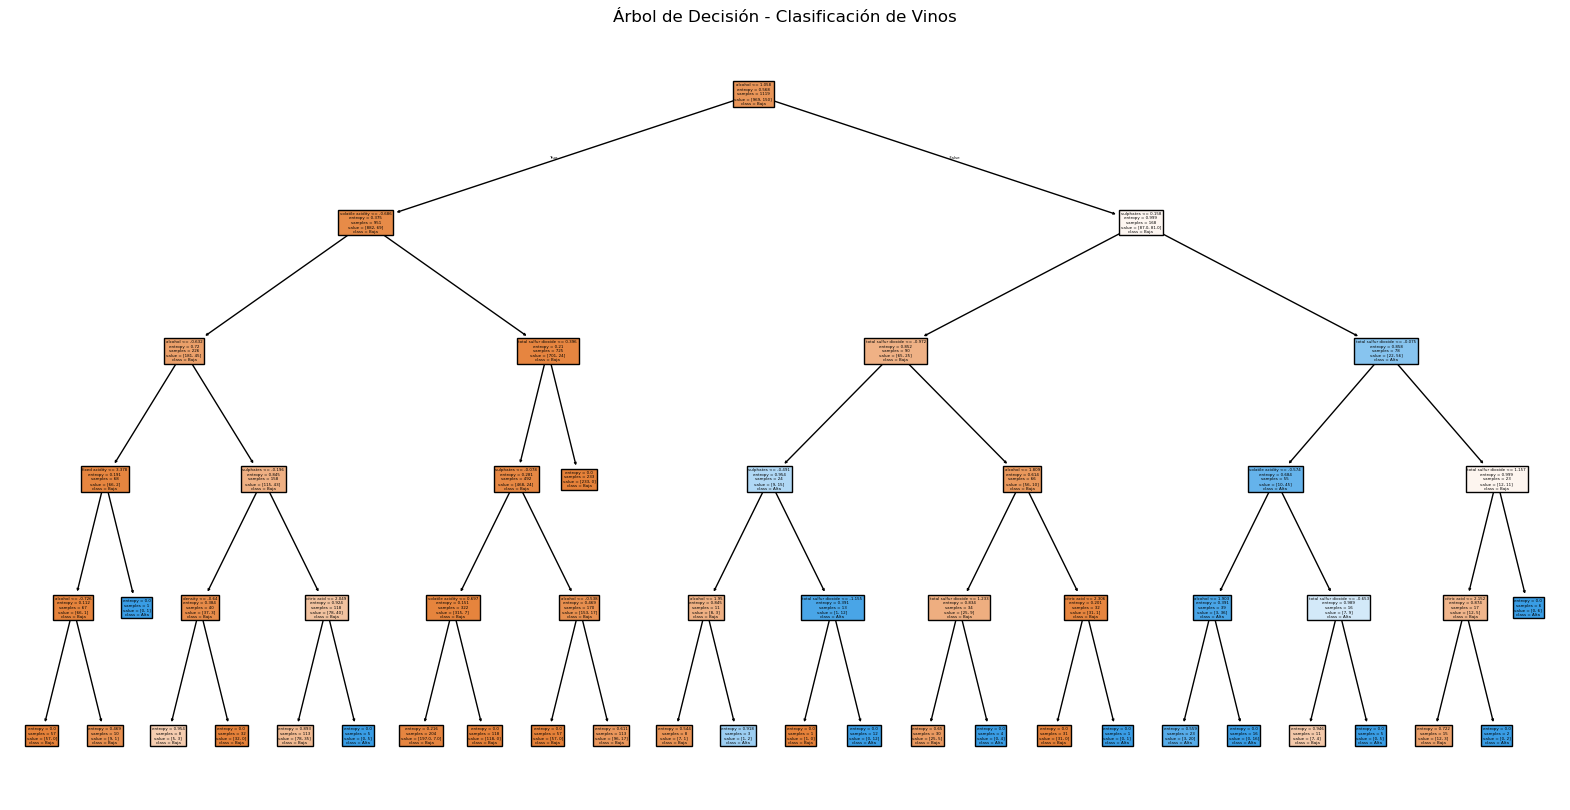

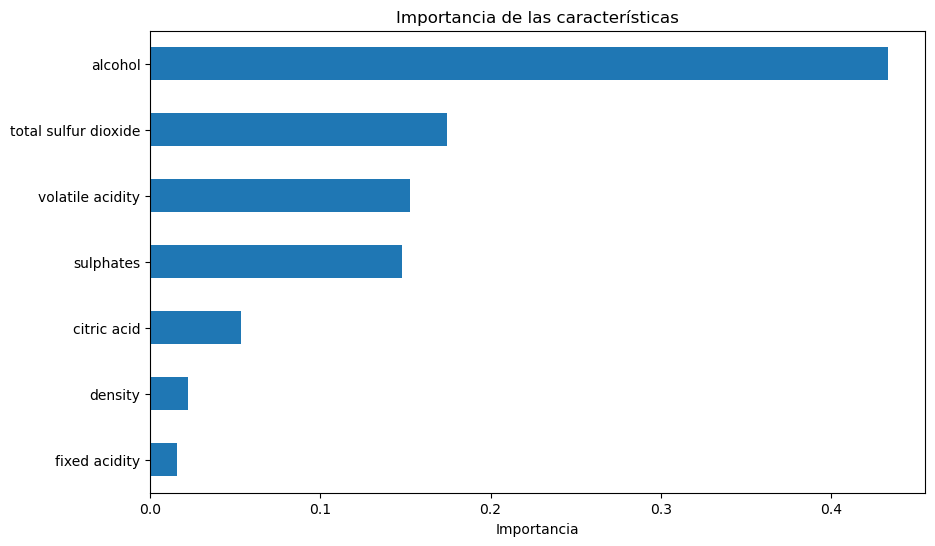

In [16]:
# ================================================
# PASO 7: Visualización del Modelo y Resultados
# ================================================
from sklearn.tree import plot_tree

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=selected_features, class_names=['Baja', 'Alta'], filled=True)
plt.title("Árbol de Decisión - Clasificación de Vinos")
plt.show()

# Importancia de características
feat_importances = pd.Series(tree_model.feature_importances_, index=selected_features)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title("Importancia de las características")
plt.xlabel("Importancia")
plt.show()


In [18]:
# ================================================
# PASO 8: Interpretación de Resultados
# ================================================
print("Interpretación:")
print("""
El modelo de Árbol de Decisión permite visualizar las decisiones que conducen a clasificar un vino como de alta o baja calidad.
Se seleccionaron las características más relevantes y se limitaron los niveles del árbol para evitar sobreajuste.
Las métricas indican la capacidad del árbol para predecir con cierta precisión, aunque podrían mejorarse con poda o ensamble.
""")

Interpretación:

El modelo de Árbol de Decisión permite visualizar las decisiones que conducen a clasificar un vino como de alta o baja calidad.
Se seleccionaron las características más relevantes y se limitaron los niveles del árbol para evitar sobreajuste.
Las métricas indican la capacidad del árbol para predecir con cierta precisión, aunque podrían mejorarse con poda o ensamble.

